<a href="https://colab.research.google.com/github/saracarl/colab_notebooks/blob/main/NYCDeathIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## 1. Set up Environment and create inference Client

The first task is to install the `google-genai` [Python SDK](https://googleapis.github.io/python-genai/) and obtain an API key. If you don”t have a can get one from Google AI Studio: [Get a Gemini API key](https://aistudio.google.com/app/apikey). If you are new to Google Colab checkout the [quickstart](../quickstarts/Authentication.ipynb)).


In [2]:
%pip install "google-genai>=1"

Once you have the SDK and API key, you can create a client and define the model you are going to use the new Gemini 2.0 Flash model, which is available via [free tier](https://ai.google.dev/pricing#2_0flash) with 1,500 request per day (at 2025-02-06).

In [3]:
from google import genai
from google.colab import userdata
api_key = userdata.get("GOOGLE_API_KEY") # If you are not using Colab you can set the API key directly

# Create a client
client = genai.Client(api_key=api_key)

# Define the model you are going to use
model_id =  "gemini-2.0-flash" # or "gemini-2.0-flash-lite"  , "gemini-2.5-flash-preview-05-20","gemini-2.5-pro-preview-05-06"

*Note: If you want to use Vertex AI see [here](https://googleapis.github.io/python-genai/#create-a-client) how to create your client*

## 2. Work with cropped images

Gemini models are able to process [images and videos](https://ai.google.dev/gemini-api/docs/vision?lang=python#image-input), which can used with base64 strings or using the `files`api. After uploading the file you can include the file uri in the call directly. The Python API includes a [upload](https://googleapis.github.io/python-genai/#upload) and [delete](https://googleapis.github.io/python-genai/#delete) method.



In [4]:
!wget -q -O column1.jpg https://fromthepage.com/image-service/34969491/135,264,1107,2512/full/0/default.jpg
!wget -q -O column2.jpg https://fromthepage.com/image-service/34969491/1213,268,1107,2512/full/0/default.jpg

You can now upload the files using our client with the `upload` method. Let's try this for one of the files.


In [5]:
column1 = client.files.upload(file="column1.jpg", config={'display_name': 'column1'})
column2 = client.files.upload(file="column2.jpg", config={'display_name': 'column2'})

_Note: The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but they cannot be downloaded. File uploads are available at no cost._

After a file is uploaded you can check to how many tokens it got converted. This not only help us understand the context you are working with it also helps to keep track of the cost.

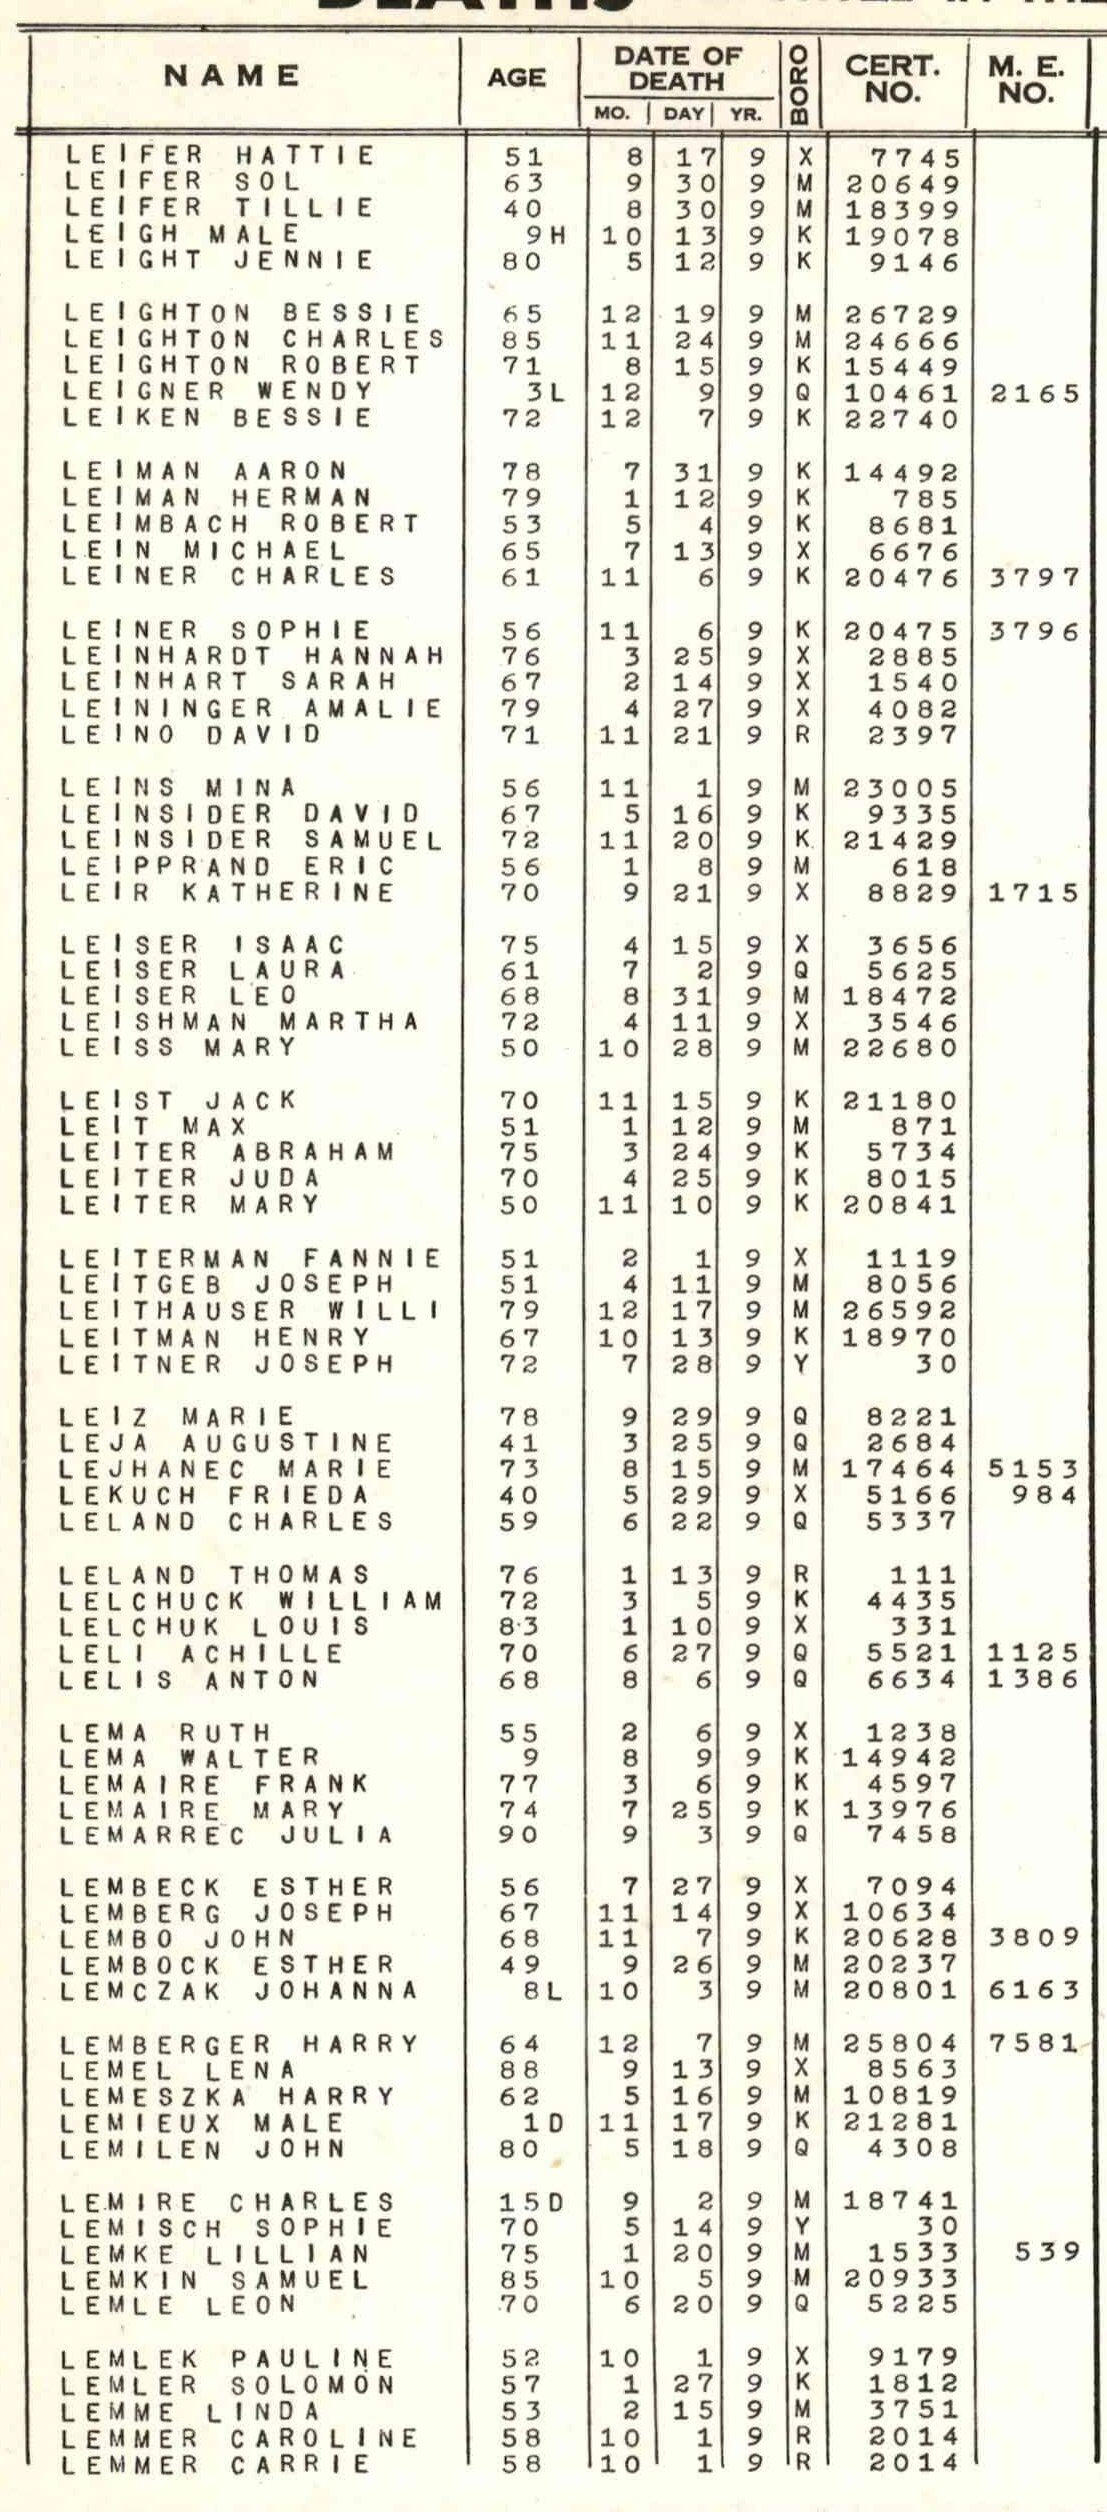

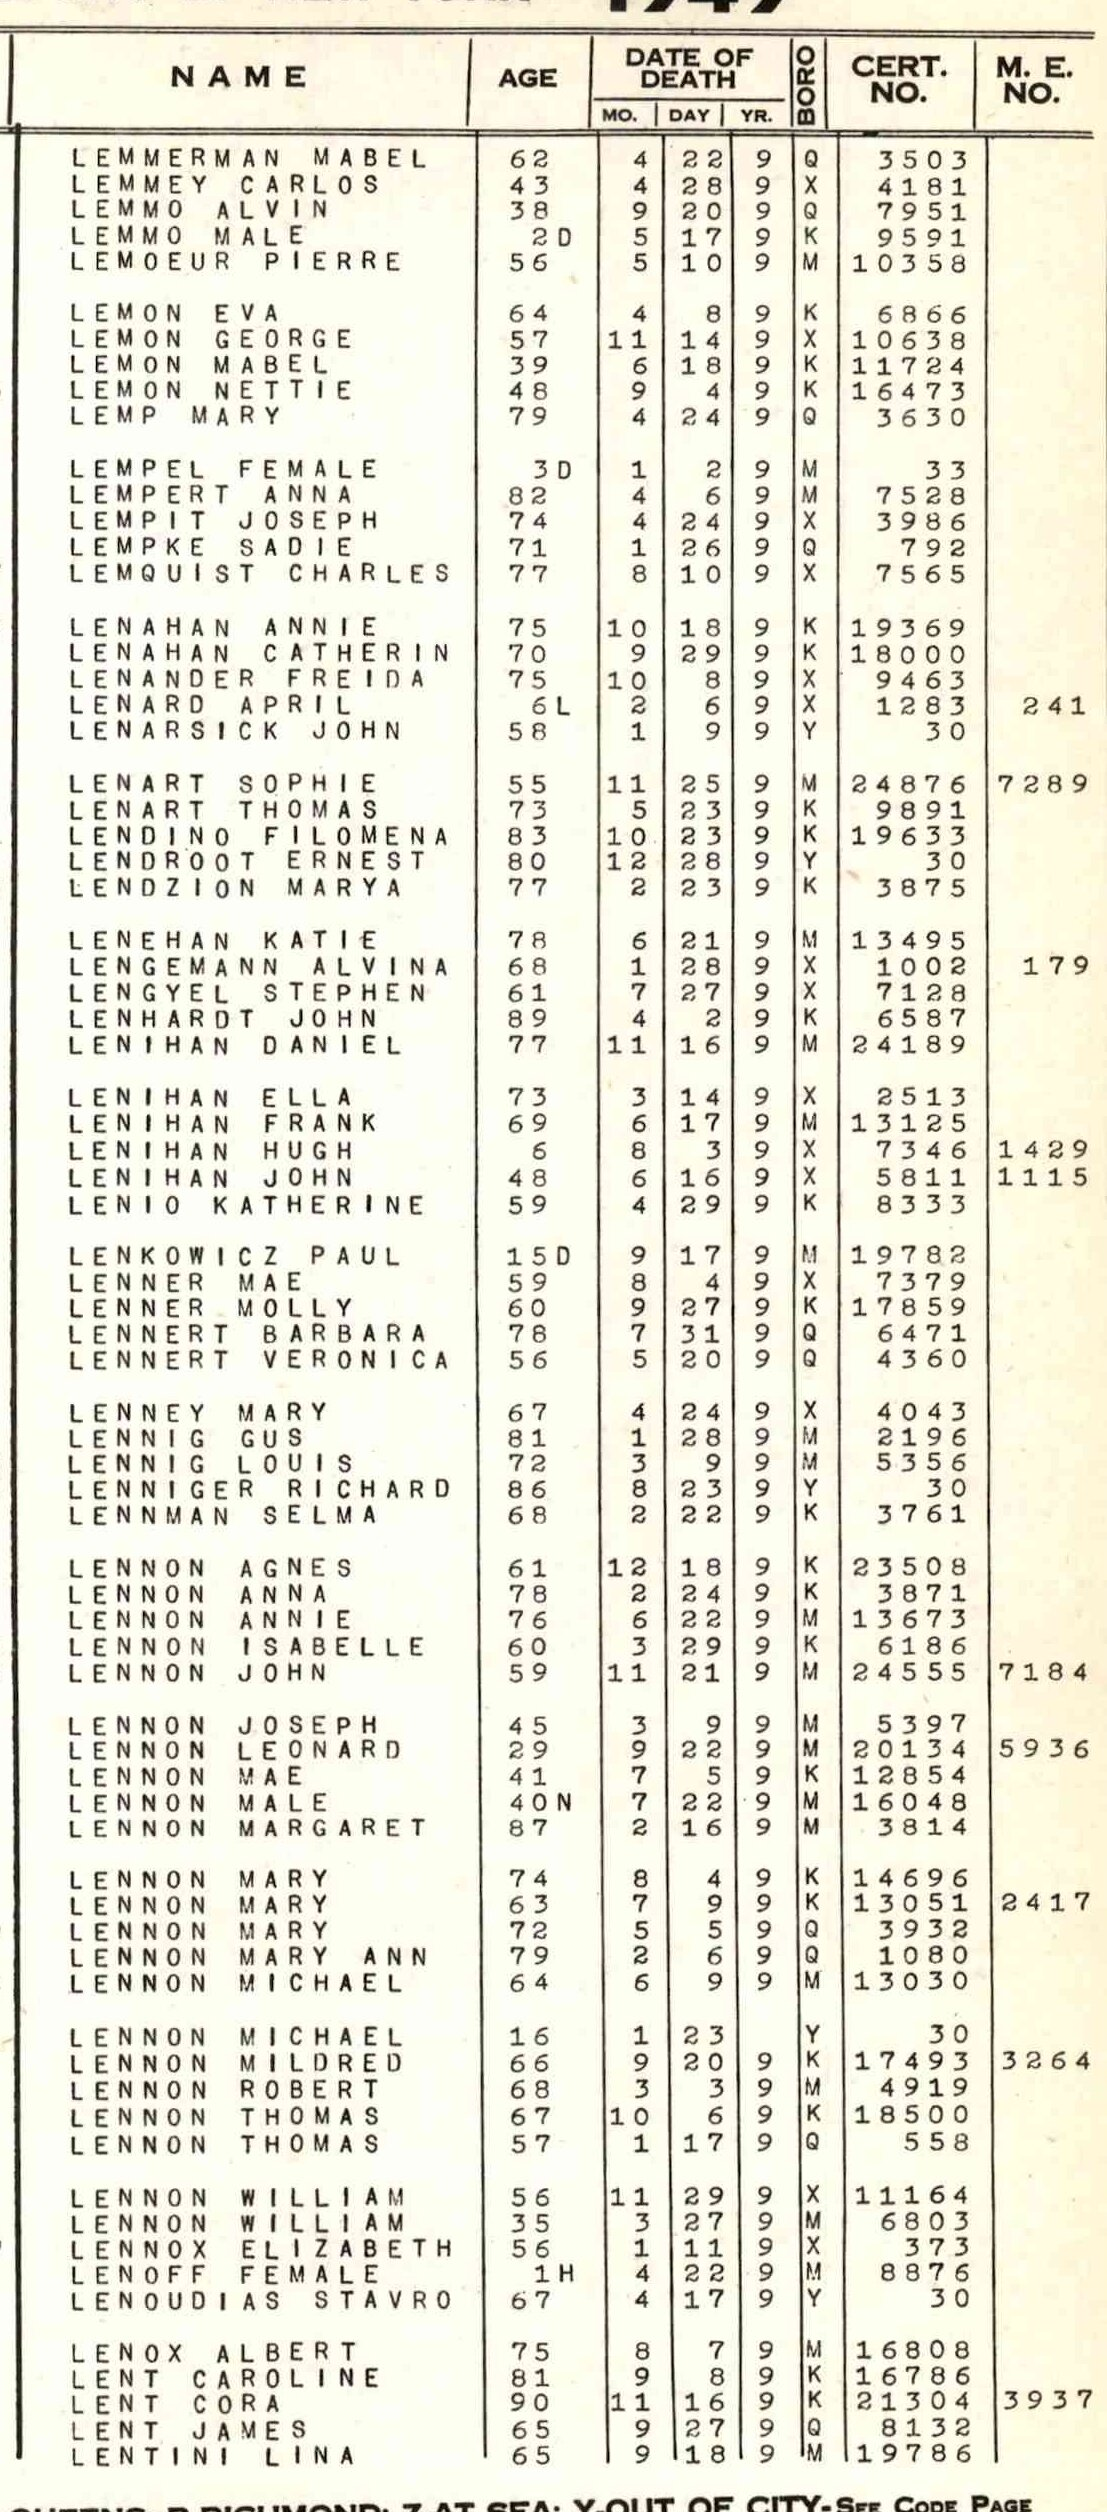

In [7]:
# prompt: Display both column images for reference

from IPython.display import Image, display

display(Image('column1.jpg'))
display(Image('column2.jpg'))

In [8]:
# prompt: For the column1 image, extract all the rows of data from the table.  Label each column appropriately: NAME, AGE, Death Month, Death Day, Death Year, Borough abbreviation, certificate no, and M. E. No if available.

prompt = """
Extract all the rows of data from the table in the image.
Label each column appropriately:
NAME, AGE, Death Month, Death Day, Death Year, Borough abbreviation, certificate no, and M. E. No if available.
Format the output as a CSV.
"""

response = client.models.generate_content(model=model_id, contents=[prompt, column1])

In [9]:
# prompt: pretty print the csv in a human readable way

import pandas as pd
import io

csv_data = response.text

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# Display the DataFrame nicely
display(df)

,,,,,,,```csv
NAME,AGE,Death Month,Death Day,Death Year,Borough abbreviation,certificate no,M. E. No
LEIFER HATTIE,51,8,17,9,X,7745,NaN
LEIFER SOL,63,9,30,9,M,20649,NaN
LEIFER TILLIE,40,8,30,9,M,18399,NaN
LEIGH MALE,9H,10,13,9,K,19078,NaN
...,...,...,...,...,...,...,...
LEMLER SOLOMON,57,1,27,9,K,1812,NaN
LEMME LINDA,53,2,15,9,M,3751,NaN
LEMMER CAROLINE,58,10,1,9,R,2014,NaN
LEMMER CARRIE,58,10,1,9,R,2014,NaN


In [10]:
# prompt: For the column1 image, extract all the rows of data from the table.  Label each column appropriately: NAME, AGE, Death Month, Death Day, Death Year, Borough abbreviation, certificate no, and M. E. No if available.

prompt = """
Extract all the rows of data from the table in the image.
Label each column appropriately:
NAME, AGE, Death Month, Death Day, Death Year, Borough abbreviation, certificate no, and M. E. No if available.
Format the output as a CSV.
"""

response = client.models.generate_content(model=model_id, contents=[prompt, column2])

In [11]:
# prompt: pretty print the csv in a human readable way

import pandas as pd
import io

csv_data = response.text

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# Display the DataFrame nicely
display(df)

,,,,,,,```csv
NAME,AGE,Death Month,Death Day,Death Year,Borough abbreviation,certificate no,M. E. No
LEMMERMAN MABEL,62,4,22,9,Q,3503,NaN
LEMMEY CARLOS,43,4,28,9,X,4181,NaN
LEMMO ALVIN,38,9,20,9,Q,7951,NaN
LEMMO MALE,2D,5,17,9,K,9591,NaN
...,...,...,...,...,...,...,...
LENT CAROLINE,81,9,8,9,K,16786,3937
LENT CORA,90,11,16,9,K,21304,NaN
LENT JAMES,65,9,27,9,Q,8132,NaN
LENTINI LINA,65,9,18,9,M,19786,NaN


In [12]:
prompt = """
Extract all the rows of data from the table in the image.
Label each column appropriately:
FIRST NAME, LAST NAME, AGE, Death Month, Death Day, Borough abbreviation, certificate no, and M. E. No if available.  Please skip "Death Year".  Please expand the borough abbreviation as follows: X-Bronx, K-Brooklyn, Q-Queens, M-Manhattan, R-Richmond, Z-At Sea, Y-Out of City.
Please zero pad single digit months and days. Age is mostly in years, but occasionally will be followed by a N, H, D, or L to indicate portions of years.  Format the output as a CSV.
"""

response = client.models.generate_content(model=model_id, contents=[prompt, column1])

In [13]:
# prompt: pretty print the csv in a human readable way

import pandas as pd
import io

csv_data = response.text

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# Check if 'M. E. No' column exists before attempting to modify it
if 'M. E. No' in df.columns:
    df['M. E. No'] = df['M. E. No'].astype(str)
    # Fill NaN values in the 'M. E. No' column with an empty string
    df['M. E. No'] = df['M. E. No'].fillna('')

# Display the DataFrame nicely
display(df)

,,,,,,,```csv
FIRST NAME,LAST NAME,AGE,Death Month,Death Day,Borough abbreviation,certificate no,M. E. No
HATTIE,LEIFER,51,08,17,X-Bronx,7745,NaN
SOL,LEIFER,63,09,30,M-Manhattan,20649,NaN
TILLIE,LEIFER,40,08,30,M-Manhattan,18399,NaN
MALE,LEIGH,9H,10,13,K-Brooklyn,19078,NaN
...,...,...,...,...,...,...,...
SOLOMON,LEMLER,57,01,27,K-Brooklyn,1812,NaN
LINDA,LEMME,53,02,15,R-Richmond,3751,NaN
CAROLINE,LEMMER,58,10,01,R-Richmond,2014,NaN
CARRIE,LEMMER,58,10,19,R-Richmond,2014,NaN
